# This notebook consists for the code for creating a Tangency Portfolio and Portfolio Possibility Frontier for the given Securities:

Domestic securies:
*   AEGISLOG
*   CANBK
*   STARHEALTH
*   PPLPHARMA
*   KAJARIACER
*   BSOFT
*   360ONE
*   GNFC

International Security:
*   NVDA (Nvidia)
Cryptocurrency:
*   SOL-USD (Solana)

The code contains step-by-step procedure for calculating annualized returns, risk, for all the securities, and **NIFTY50** (Index chosen by us for Comparison)












*Packages to be imported*

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

*Tickers for the domestic, international and cryptocurrency securities*

In [3]:
domestic_tickers = ['AEGISLOG.BO', 'CANBK.NS', 'STARHEALTH.NS', 'PPLPHARMA.NS', 'KAJARIACER.NS', 'BSOFT.NS', '360ONE.NS', 'GNFC.NS']
international_ticker = ['NVDA']
crypto_ticker = ['SOL-USD']
nifty_ticker = ['^NSEI']

*We calculate the domestic,international and NIFTY returns using the formula = (Pt - Pt-1) / Pt*

In [4]:
df1 = yf.download(domestic_tickers,start = '2023-01-01', end = '2024-01-01')["Adj Close"]
df1 = df1.dropna()

df2 = yf.download(international_ticker + crypto_ticker,start = '2023-01-01', end = '2024-01-01')["Adj Close"]
df2 = df2.dropna()

nifty = yf.download(nifty_ticker, start='2023-01-1', end='2024-01-01')['Adj Close']
nifty = nifty.dropna()

returns_domestic = df1.pct_change()
returns_domestic.dropna(inplace=True)

returns_international = df2.pct_change()
returns_international.dropna(inplace=True)

nifty_returns = nifty.pct_change()
nifty_returns.dropna(inplace=True)

[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


*Plotting the security prices for the period of 01-01-23 to 01-01-24 to ensure that no security has continuous decreasing returns (for avoiding very -ve weights)*

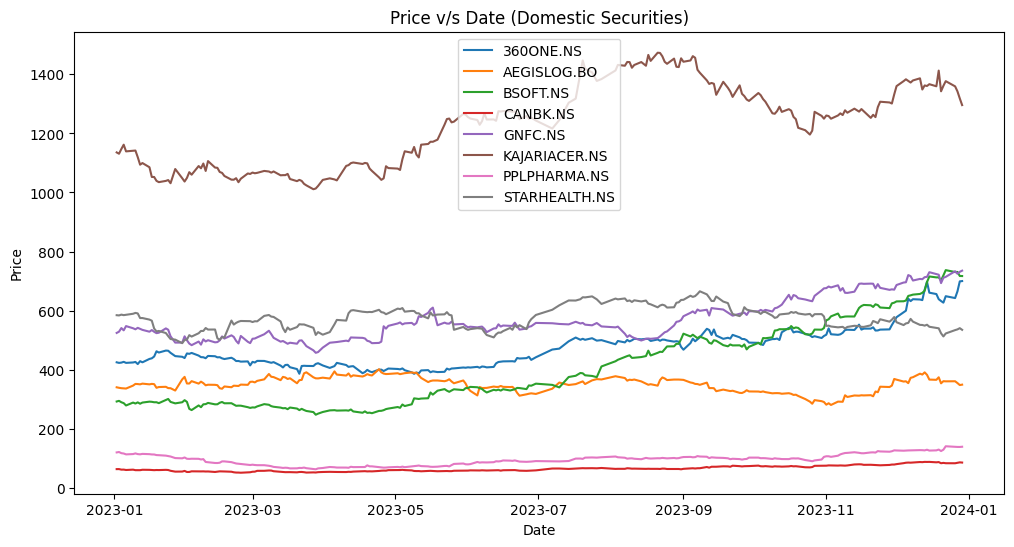

In [5]:
plt.figure(figsize=(12, 6))
for company in df1.columns:
  plt.plot(df1.index,df1[company], label=company)
plt.title('Price v/s Date (Domestic Securities)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

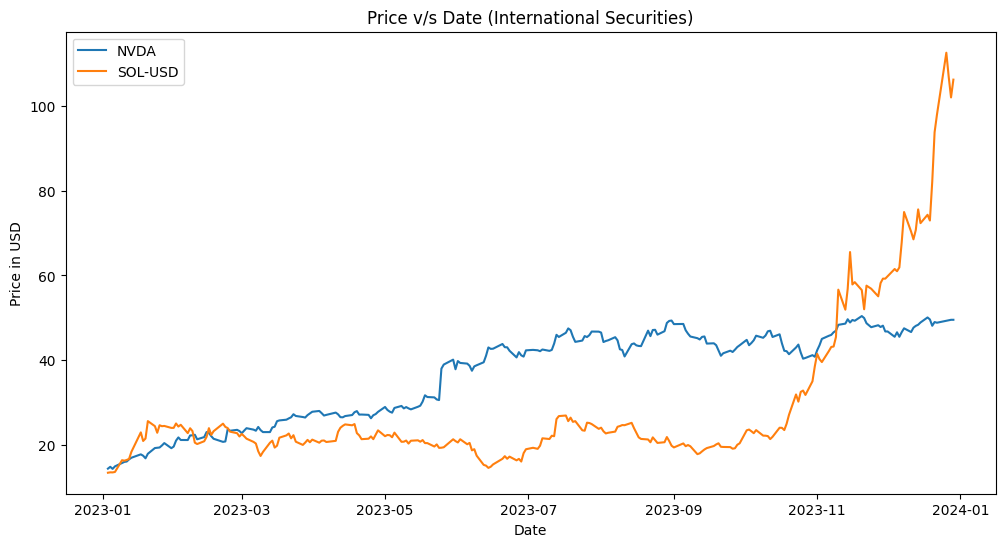

In [6]:
plt.figure(figsize=(12, 6))
for company in df2.columns:
  plt.plot(df2.index,df2[company], label=company)
plt.title('Price v/s Date (International Securities)')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

*Since none of the securities has a period giving constant negative returns, we can use the Time-period for 01-01-23 to 01-01-24*

To annualize the returns, we have calculated the **HPR** (Geometric Mean) and then applied the formula for the **AHPR**

The other method for calculating the annualized return involves taking the mean of the DataFrame, and applying the EAR formula on it

In [7]:
# def calculate_annualized_return(returns):
#     AHPR = (1+returns).prod()**(252/len(returns)) - 1
#     return AHPR

def calculate_annualized_return(returns):
  return (1+returns.mean())**252-1

*calculating annualized returns for domestic portfolio and NIFTY50*

In [8]:
returns_domestic_annualized = calculate_annualized_return(returns_domestic)
returns_international_annualized = calculate_annualized_return(returns_international)
nifty_returns_annualized = calculate_annualized_return(nifty_returns)

In [9]:
nifty_returns_annualized

0.206952264469775

In [10]:
risk_domestic_annualized = returns_domestic.std()*np.sqrt(252)
risk_international_annualized = returns_international.std()*np.sqrt(252)
nifty_risk_annualized = nifty_returns.std()*np.sqrt(252)

In [11]:
risk_return_df_domestic = pd.DataFrame()
risk_return_df_domestic['Annualized Return'] = returns_domestic_annualized
risk_return_df_domestic['Annualized Risk'] = risk_domestic_annualized
risk_return_df_domestic['C.V'] = risk_return_df_domestic['Annualized Risk']/risk_return_df_domestic['Annualized Return']
risk_return_df_international = pd.DataFrame()
risk_return_df_international['Annualized Return'] = returns_international_annualized
risk_return_df_international['Annualized Risk'] = risk_international_annualized
risk_return_df_international['C.V'] = risk_return_df_international['Annualized Risk']/risk_return_df_international['Annualized Return']
risk_return_df_nifty = pd.DataFrame()
risk_return_df_nifty['Annualized Return'] = nifty_returns_annualized
risk_return_df_nifty['Annualized Risk'] = nifty_risk_annualized

In [12]:
risk_return_df_domestic

,Annualized Return,Annualized Risk,C.V
Ticker,,,
360ONE.NS,0.818156,0.313120,0.382714
AEGISLOG.BO,0.105726,0.383356,3.625953
BSOFT.NS,1.844554,0.341611,0.185200
CANBK.NS,0.462369,0.309837,0.670107
GNFC.NS,0.523443,0.314205,0.600266
KAJARIACER.NS,0.194458,0.256335,1.318205
PPLPHARMA.NS,0.276331,0.403464,1.460076
STARHEALTH.NS,-0.050636,0.303076,-5.985446


In [13]:
risk_return_df_international

,Annualized Return,Annualized Risk,C.V
Ticker,,,
NVDA,2.925978,0.484566,0.165608
SOL-USD,11.496844,0.948331,0.082486


In [14]:
nifty_returns_annualized

0.206952264469775

In [15]:
nifty_risk_annualized

0.09825602059591837

In [16]:
cov_matrix = returns_domestic.cov()*252
cov_matrix

Ticker,360ONE.NS,AEGISLOG.BO,BSOFT.NS,CANBK.NS,GNFC.NS,KAJARIACER.NS,PPLPHARMA.NS,STARHEALTH.NS
Ticker,,,,,,,,
360ONE.NS,0.098044,-0.000251,0.008484,0.021914,0.002752,-0.001659,0.011153,0.003768
AEGISLOG.BO,-0.000251,0.146962,-0.003169,0.027054,0.006715,0.007510,0.014733,0.017362
BSOFT.NS,0.008484,-0.003169,0.116698,0.013259,0.021709,0.019410,0.030575,0.007609
CANBK.NS,0.021914,0.027054,0.013259,0.095999,0.029788,0.003682,0.030037,0.002722
GNFC.NS,0.002752,0.006715,0.021709,0.029788,0.098725,0.005057,0.031108,0.015072
KAJARIACER.NS,-0.001659,0.007510,0.019410,0.003682,0.005057,0.065708,0.014494,0.002340
PPLPHARMA.NS,0.011153,0.014733,0.030575,0.030037,0.031108,0.014494,0.162783,0.008102
STARHEALTH.NS,0.003768,0.017362,0.007609,0.002722,0.015072,0.002340,0.008102,0.091855


In [17]:
total_returns = pd.concat([returns_domestic, returns_international], axis=1)
cov_matrix_total = total_returns.cov()*252
cov_matrix_total

Ticker,360ONE.NS,AEGISLOG.BO,BSOFT.NS,CANBK.NS,GNFC.NS,KAJARIACER.NS,PPLPHARMA.NS,STARHEALTH.NS,NVDA,SOL-USD
Ticker,,,,,,,,,,
360ONE.NS,0.098044,-0.000251,0.008484,0.021914,0.002752,-0.001659,0.011153,0.003768,0.001388,0.008313
AEGISLOG.BO,-0.000251,0.146962,-0.003169,0.027054,0.006715,0.007510,0.014733,0.017362,-0.010816,0.000443
BSOFT.NS,0.008484,-0.003169,0.116698,0.013259,0.021709,0.019410,0.030575,0.007609,-0.001874,-0.011627
CANBK.NS,0.021914,0.027054,0.013259,0.095999,0.029788,0.003682,0.030037,0.002722,-0.000035,-0.007250
GNFC.NS,0.002752,0.006715,0.021709,0.029788,0.098725,0.005057,0.031108,0.015072,0.011734,-0.009896
KAJARIACER.NS,-0.001659,0.007510,0.019410,0.003682,0.005057,0.065708,0.014494,0.002340,0.001868,-0.029128
PPLPHARMA.NS,0.011153,0.014733,0.030575,0.030037,0.031108,0.014494,0.162783,0.008102,0.017317,-0.003762
STARHEALTH.NS,0.003768,0.017362,0.007609,0.002722,0.015072,0.002340,0.008102,0.091855,-0.002164,-0.007973
NVDA,0.001388,-0.010816,-0.001874,-0.000035,0.011734,0.001868,0.017317,-0.002164,0.234804,0.066256


*For calculating the riskfree rate, we have used a 1-Year Government Bond Data, and averaged the rate of return. The data is saved in my Google Drive*

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
riskfree_data = pd.read_csv('/content/drive/My Drive/SAPM Assignment/India 1-Year Bond Yield Historical Data.csv')
riskfree_data = riskfree_data.dropna()
riskfree_data = riskfree_data['Price']
rf = riskfree_data.mean()/100
rf

0.07021329218106996

In [20]:
nifty_sharpe_ratio = (nifty_returns_annualized - rf) / nifty_risk_annualized
nifty_sharpe_ratio

1.39165998642515

 *This function calculates the entire portfolio's - Return, Risk and Sharpe Ratio
It uses the following formulae:
risk = (wT.Covariance_Matrix.w)^0.5
returns = Summation(w.Annualized_returns)
sharpe ratio = returns - rf / risk*

In [21]:
def portfolio_performance(weights, annualized_returns, cov_matrix, rf = 0.07021329218106996):
    portfolio_return = np.sum(weights * annualized_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - rf) / portfolio_risk
    return portfolio_return, portfolio_risk, sharpe_ratio

*This function calculates the risk based on annualized returns, and the annualized Covariance Matrix*

In [22]:
def risk(weights, annualized_returns, cov_matrix):
    return portfolio_performance(weights,annualized_returns, cov_matrix)[1] # returns only the risk

This function find the Minimum Variance Point for a portfolio. It is ensured that
*   sum of weights = 1
*   the target returns are achieved
*   shorting is allowed i.e negative weights are allowed

In [23]:
def MV(target_return, annualized_returns, cov_matrix):
    num_assets = len(annualized_returns)
    initial_weights = np.array([1. / num_assets] * num_assets)

    constraints = (
        #contraint on sum of weights = 1
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        #constraint on target returns, must be achieved
        {'type': 'eq', 'fun': lambda x: portfolio_performance(x, annualized_returns, cov_matrix)[0] - target_return}
    )
    #no bounds on the weights because shorting is allowed
    bounds = None
    #minimizing the risk using scipy.optimize
    result = minimize(risk, initial_weights, args=(annualized_returns, cov_matrix),method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In this section of the code, we first create an array of the annualized domestic returns we have, and then proceed to create an array of target returns spaced between the maximum and minimum values of the returns we have received.
Next, we create a dictionary called results to store 4 characteristics for each portfolio - returns, risk, sharpe ratio, weights

In [24]:
annualized_returns_arr = np.array(returns_domestic_annualized)
target_returns_arr = np.linspace(annualized_returns_arr.min()-2,annualized_returns_arr.max()+2,200)
results = {'returns': [], 'risk': [], 'sharpe_ratio': [], 'weights': []}

In [25]:
for target in target_returns_arr:
    result = MV(target, annualized_returns_arr, cov_matrix)
    portfolio_returns, volatility, sharpe = portfolio_performance(result.x, annualized_returns_arr, cov_matrix,rf)
    results['returns'].append(portfolio_returns)
    results['risk'].append(volatility)
    results['sharpe_ratio'].append(sharpe)
    results['weights'].append(result.x)

*Function for finding the tangency portfolio*

In [26]:
def tangency_portfolio(annualized_returns, cov_matrix,risk_free_rate):
    num_assets = len(annualized_returns)
    initial_weights = np.array([1. / num_assets] * num_assets)

    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = None

    # this part of the code maximizes the -ve sharpe ratio (since optimize package only has a minimize function)
    def negative_sharpe_ratio(weights):
        return -portfolio_performance(weights, annualized_returns, cov_matrix, risk_free_rate)[2]
    result = minimize(negative_sharpe_ratio, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

*Get the Tangency Portfolio weights, returns, risk and Sharpe Ratio*

In [27]:
tangency_result = tangency_portfolio(annualized_returns_arr, cov_matrix,rf)
tangency_weights = tangency_result.x
tangency_returns, tangency_risk, tangency_sharpe_ratio = portfolio_performance(tangency_weights, annualized_returns_arr, cov_matrix, rf)
tangency_weights = np.array(tangency_weights).flatten()

# Creating the DataFrame for weights
weights_df = pd.DataFrame(
    tangency_weights,
    index=['360ONE.NS', 'AEGISLOG.BO', 'BSOFT.NS', 'CANBK.NS',
           'GNFC.NS', 'KAJARIACER.NS', 'PPLPHARMA.NS', 'STARHEALTH.NS'],
    columns=['Weight']
)
metrics_df = pd.DataFrame(
    {'Metric': ['Returns', 'Risk ', 'Sharpe Ratio'],
     'Value': [tangency_returns, tangency_risk, tangency_sharpe_ratio]}
)

*Plotting the Efficient Frontier, and finding the point with maximum Sharpe Ratio:
(8 Domestic + CAL) - Tangency Portfolio*

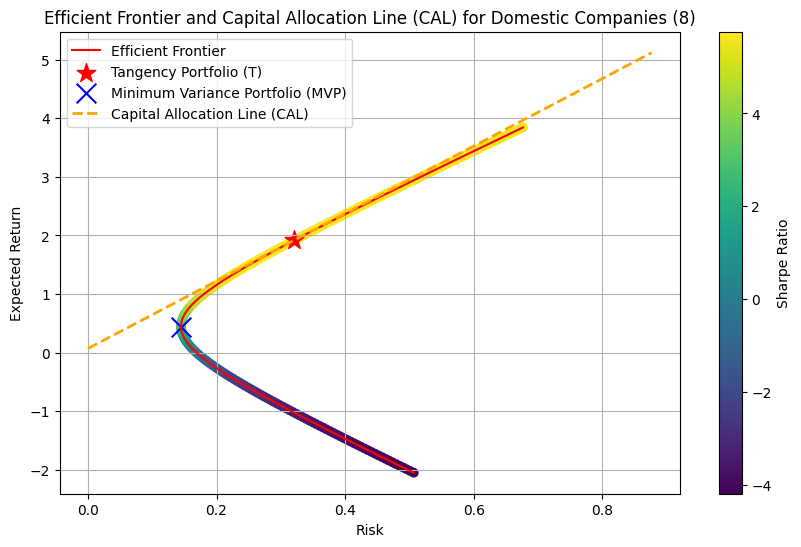

In [42]:
plt.figure(figsize=(10, 6))

plt.plot(results['risk'], results['returns'], label='Efficient Frontier', color='red')

plt.scatter(results['risk'], results['returns'], c=results['sharpe_ratio'], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier and Capital Allocation Line (CAL) for Domestic Companies (8)')
plt.grid(True)

max_sharpe_idx = np.argmax(results['sharpe_ratio'])
tangency_risk = results['risk'][max_sharpe_idx]
tangency_returns = results['returns'][max_sharpe_idx]
tangency_sharpe_ratio = results['sharpe_ratio'][max_sharpe_idx]

#plotting the Tangency Portfolio
plt.scatter(tangency_risk, tangency_returns, color='red', marker='*', s=200, label='Tangency Portfolio (T)')
mvp_idx = np.argmin(results['risk'])
mvp_risk = results['risk'][mvp_idx]
mvp_returns = results['returns'][mvp_idx]

#plotting the Minimum Variance Portfolio
plt.scatter(mvp_risk, mvp_returns, color='blue', marker='x', s=200, label='Minimum Variance Portfolio (MVP)')
mvp_data = pd.DataFrame()
mvp_data['Risk'] = [mvp_risk]
mvp_data['Returns'] = [mvp_returns]
mvp_data['Sharpe Ratio'] = [results['sharpe_ratio'][mvp_idx]]

#plotting the CAL (we have defined a range of volatilites for which the CAL is plotted)
cal_x = np.linspace(0, max(results['risk'])+0.2, 100)
cal_y = rf + tangency_sharpe_ratio * cal_x
plt.plot(cal_x, cal_y, label='Capital Allocation Line (CAL)', color='orange', linestyle='--', linewidth=2)

plt.legend()
plt.show()

In [29]:
weights_df.to_csv('domestic_weights.csv')
weights_df

,Weight
360ONE.NS,0.361992
AEGISLOG.BO,0.063658
BSOFT.NS,0.864401
CANBK.NS,0.020957
GNFC.NS,0.119206
KAJARIACER.NS,-0.123620
PPLPHARMA.NS,-0.129153
STARHEALTH.NS,-0.177440


In [30]:
# these values are not in the %form, they need to be multiplied by 100 for a percentage form
metrics_df.to_csv('domestic_metrics.csv')
metrics_df

,Metric,Value
0,Returns,1.918675
1,Risk,0.321001
2,Sharpe Ratio,5.758426


In [31]:
mvp_data

,Risk,Returns,Sharpe Ratio
0,0.144756,0.437786,2.539258


*Here we have included the International + Domestic Portfolios*

In [32]:
total_returns = pd.concat([returns_domestic, returns_international], axis=1)
compounded_total_returns = calculate_annualized_return(total_returns)
total_cov_matrix_daily = total_returns.cov()
total_cov_matrix_annual = total_cov_matrix_daily * 252

In [33]:
compounded_total_returns = np.array(compounded_total_returns)
new_target_returns = np.linspace(compounded_total_returns.min()-2, compounded_total_returns.max()+2, 200)

new_results = {'returns': [], 'volatility': [], 'sharpe': [], 'weights': []}
for target in new_target_returns:
    result = MV(target, compounded_total_returns, total_cov_matrix_annual)
    returns, volatility, sharpe = portfolio_performance(result.x, compounded_total_returns, total_cov_matrix_annual, rf)
    new_results['returns'].append(returns)
    new_results['volatility'].append(volatility)
    new_results['sharpe'].append(sharpe)
    new_results['weights'].append(result.x)

In [34]:
# Get the tangency portfolio
new_tangency_result = tangency_portfolio(compounded_total_returns, total_cov_matrix_annual, rf)
new_tangency_weights = new_tangency_result.x
new_tangency_returns, new_tangency_volatility, new_tangency_sharpe = portfolio_performance(new_tangency_weights, compounded_total_returns,total_cov_matrix_annual, rf)

*Concatenating the dataframes for both domestic and international returns*

In [35]:
total_returns = pd.concat([returns_domestic, returns_international], axis=1)
compounded_total_returns = calculate_annualized_return(total_returns)
total_cov_matrix_daily = total_returns.cov()
total_cov_matrix_annual = total_cov_matrix_daily * 252

In [36]:
tangency_weights = np.array(new_tangency_weights).flatten()

# Creating the DataFrame for weights
weights_df = pd.DataFrame(
    tangency_weights,
    index=['360ONE.NS', 'AEGISLOG.BO', 'BSOFT.NS', 'CANBK.NS',
           'GNFC.NS', 'KAJARIACER.NS', 'PPLPHARMA.NS', 'STARHEALTH.NS', 'NVDA', 'SOL-USD'],
    columns=['Weight']
)
metrics_df = pd.DataFrame(
    {'Metric': ['Returns', 'Risk ', 'Sharpe Ratio'],
     'Value': [new_tangency_returns, new_tangency_volatility, new_tangency_sharpe]}
)


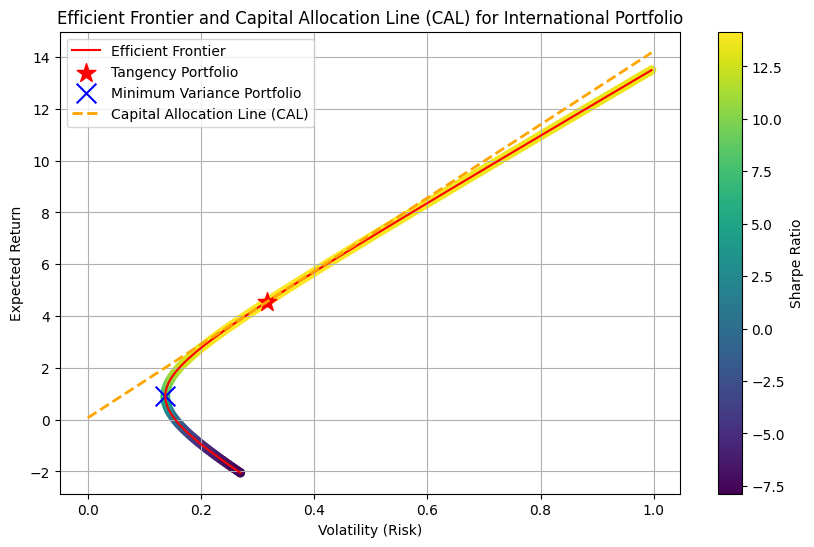



NIFTY50 Annualized Return: 0.206952264469775
NIFTY50 Annualized Volatility: 0.09825602059591837


In [41]:
compounded_total_returns = np.array(compounded_total_returns)
new_target_returns = np.linspace(compounded_total_returns.min()-2, compounded_total_returns.max()+2, 200)

new_results = {'returns': [], 'volatility': [], 'sharpe': [], 'weights': []}
for target in new_target_returns:
    result = MV(target, compounded_total_returns, total_cov_matrix_annual)
    if result.success:
        returns, volatility, sharpe = portfolio_performance(result.x, compounded_total_returns, total_cov_matrix_annual, rf)
        new_results['returns'].append(returns)
        new_results['volatility'].append(volatility)
        new_results['sharpe'].append(sharpe)
        new_results['weights'].append(result.x)
    else:
        print(f"Failed to optimize for target return: {target} - {result.message}")

# Get the tangency portfolio
new_tangency_result = tangency_portfolio(compounded_total_returns, total_cov_matrix_annual, rf)
new_tangency_weights = new_tangency_result.x
new_tangency_returns, new_tangency_volatility, new_tangency_sharpe = portfolio_performance(new_tangency_weights, compounded_total_returns,total_cov_matrix_annual, rf)

plt.figure(figsize=(10, 6))
plt.plot(new_results['volatility'], new_results['returns'], label='Efficient Frontier', color='red')
plt.scatter(new_results['volatility'], new_results['returns'], c=new_results['sharpe'], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier and Capital Allocation Line (CAL) for International Portfolio')
plt.grid(True)

plt.scatter(new_tangency_volatility, new_tangency_returns, color='red', marker='*', s=200, label='Tangency Portfolio')

mvp_idx = np.argmin(new_results['volatility'])
mvp_weights = new_results['weights'][mvp_idx]
mvp_returns = new_results['returns'][mvp_idx]
mvp_volatility = new_results['volatility'][mvp_idx]
plt.scatter(mvp_volatility, mvp_returns, color='blue', marker='x', s=200, label='Minimum Variance Portfolio')

mvp_data = pd.DataFrame()
mvp_data['Risk'] = [mvp_volatility]
mvp_data['Returns'] = [mvp_returns]
mvp_data['Sharpe Ratio'] = [new_results['sharpe'][mvp_idx]]

cal_x = np.linspace(0, max(new_results['volatility']), 100)
cal_y = rf + new_tangency_sharpe * cal_x

#plotting the CAL
plt.plot(cal_x, cal_y, label='Capital Allocation Line (CAL)', color='orange', linestyle='--', linewidth=2)

plt.legend()
plt.show()

print("\n")
print("NIFTY50 Annualized Return:", nifty_returns_annualized)
print("NIFTY50 Annualized Volatility:", nifty_risk_annualized)

In [37]:
mvp_data

,Risk,Returns,Sharpe Ratio
0,0.144756,0.437786,2.539258


In [38]:
weights_df.to_csv('international_weights.csv')
weights_df

,Weight
360ONE.NS,0.114840
AEGISLOG.BO,0.028378
BSOFT.NS,0.364515
CANBK.NS,0.040630
GNFC.NS,0.038280
KAJARIACER.NS,0.064961
PPLPHARMA.NS,-0.084109
STARHEALTH.NS,-0.042807
NVDA,0.200874
SOL-USD,0.274438


In [39]:
metrics_df.to_csv('international_metrics.csv')
metrics_df

,Metric,Value
0,Returns,4.542630
1,Risk,0.315892
2,Sharpe Ratio,14.158067


In [40]:
nifty_risk_annualized

0.09825602059591837